<a href="https://colab.research.google.com/github/joangog/object-detection/blob/main/coco2017_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model comparison on COCO 2017 dataset (Analysis)
*   SSD300 VGG16
*   SSDlite320 MobileNetV3-Large
*   Faster R-CNN ResNet-50 FPN
*   Faster R-CNN MobileNetV3-Large FPN
*   Mask R-CNN ResNet-50 FPN
*   YOLOv5s
*   YOLOv5m
*   YOLOv5l
*   YOLOv3 (to do)
*   YOLOv3 Tiny (to do)

### Import packages

In [2]:
from google.colab import drive

import os

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Gather evaluation results

In [8]:
# Mount GDrive directory
drive.mount('/content/drive')
results_dir = '/content/drive/MyDrive/object-detection-outputs/COCO2017'
results_files = os.listdir(results_dir)
results_files = [file for file in results_files if ('.csv' in file) and ('coco17' in file)]

print('Files found:')

results = pd.DataFrame(columns=['model', 'model_time', 'iou_type', 'metric', 'iou', 'area', 'max_dets', 'score'])
for file in results_files:
  print(f'\t{file}')
  file_path = os.path.join(results_dir,file)
  results = results.append(pd.read_csv(file_path))
results = results.reset_index().iloc[:,1:-1]  # Drop uneeded columns
results = results.sort_values(['model'])

print('\n')
results

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files found:
	ssd300_vgg16_coco17_results.csv
	maskrcnn_resnet50_fpn_coco17_results.csv
	fasterrcnn_resnet50_fpn_coco17_results.csv
	yolov5s_coco17_results.csv
	yolov5m_coco17_results.csv
	yolov5l_coco17_results.csv
	ssdlite320_mobilenet_v3_large_coco17_results.csv
	fasterrcnn_mobilenet_v3_large_fpn_coco17_results.csv
	yolov3_coco17_results.csv
	yolov3_spp_coco17_results.csv
	yolov3_tiny_coco17_results.csv




,model,model_time,iou_type,metric,iou,area,max_dets,score,Unnamed: 0
105,Faster R-CNN MobileNetV3-Large FPN,0.163559,bbox,avg_recall,0.50:0.95,small,100,0.196455,9.0
107,Faster R-CNN MobileNetV3-Large FPN,0.163559,bbox,avg_recall,0.50:0.95,large,100,0.646608,11.0
106,Faster R-CNN MobileNetV3-Large FPN,0.163559,bbox,avg_recall,0.50:0.95,medium,100,0.500917,10.0
96,Faster R-CNN MobileNetV3-Large FPN,0.163559,bbox,avg_precision,0.50:0.95,all,100,0.327902,0.0
97,Faster R-CNN MobileNetV3-Large FPN,0.163559,bbox,avg_precision,0.50,all,100,0.525563,1.0
...,...,...,...,...,...,...,...,...,...
51,YOLOv5s,0.058597,bbox,avg_precision,0.50:0.95,small,100,0.151893,3.0
50,YOLOv5s,0.058597,bbox,avg_precision,0.75,all,100,0.340662,2.0
49,YOLOv5s,0.058597,bbox,avg_precision,0.50,all,100,0.456697,1.0
48,YOLOv5s,0.058597,bbox,avg_precision,0.50:0.95,all,100,0.311320,0.0


### Plot  fps/mAP graph (max detections = 100)

[0.3279022  0.36915638 0.37821932 0.25105235 0.21308167 0.36808746
 0.38047566 0.1218178  0.43206616 0.39450703 0.31132038]


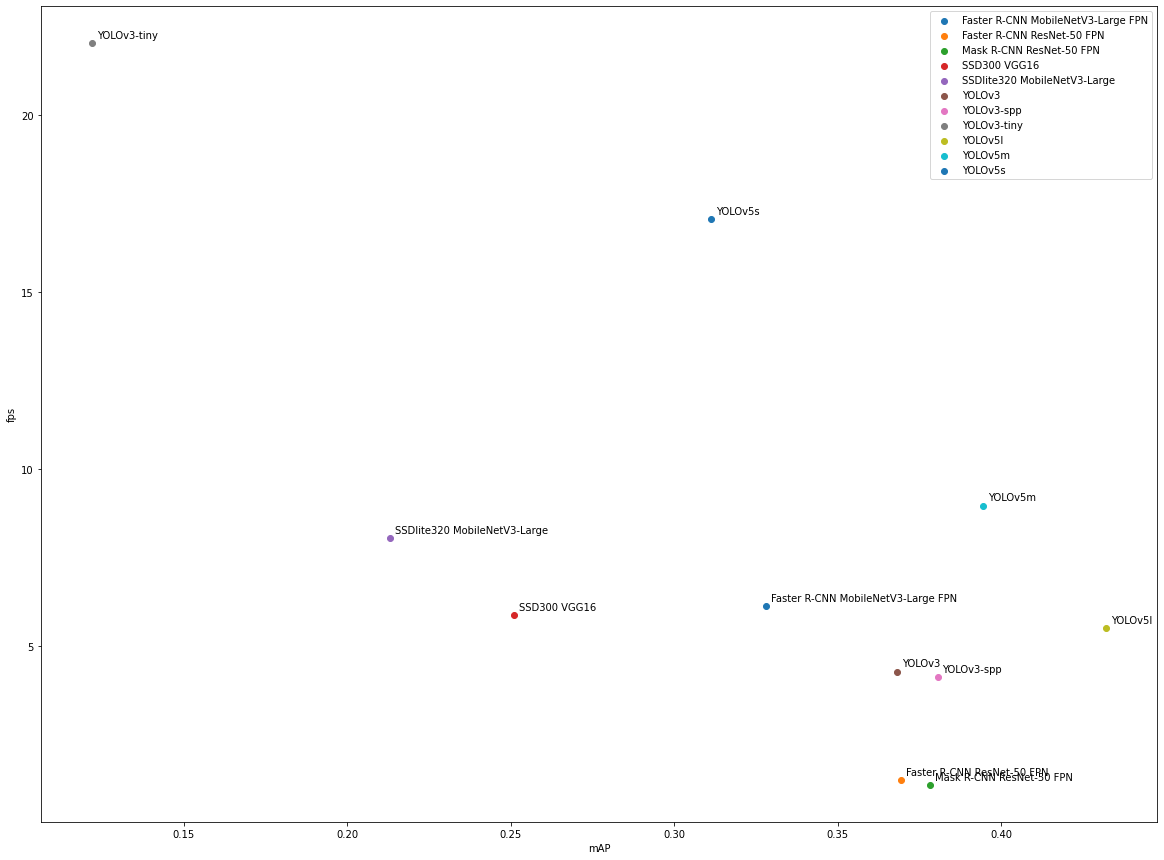

In [14]:
models = results.model.unique()

plot_data = results[
              (results['iou_type'] == 'bbox') &
              (results['metric'] == 'avg_precision') & 
              (results['iou'] == '0.50:0.95') &
              (results['area'] == 'all') &
              (results['max_dets'] == 100)
              ]

time = plot_data['model_time'].values
fps = 1.0 / time
mAP = plot_data['score'].values

plt.figure(figsize=(20,15))

plt.xlabel('mAP')
plt.ylabel('fps')

for i, model in enumerate(models):
    plt.annotate(model, (mAP[i], fps[i]), xytext=(5, 5), textcoords='offset points')
    plt.scatter(mAP[i],fps[i])

plt.legend(models, scatterpoints=1)

plt.show()

### Plot  fps/F1 graph (max detections = 100)

[0.3773083909591744, 0.42777814252297397, 0.43753802367890826, 0.2974040585052621, 0.26013002684196734, 0.39907270953692886, 0.41059084760135384, 0.13435798314728126, 0.4630869858514664, 0.42366622183419783, 0.33818121194189205]


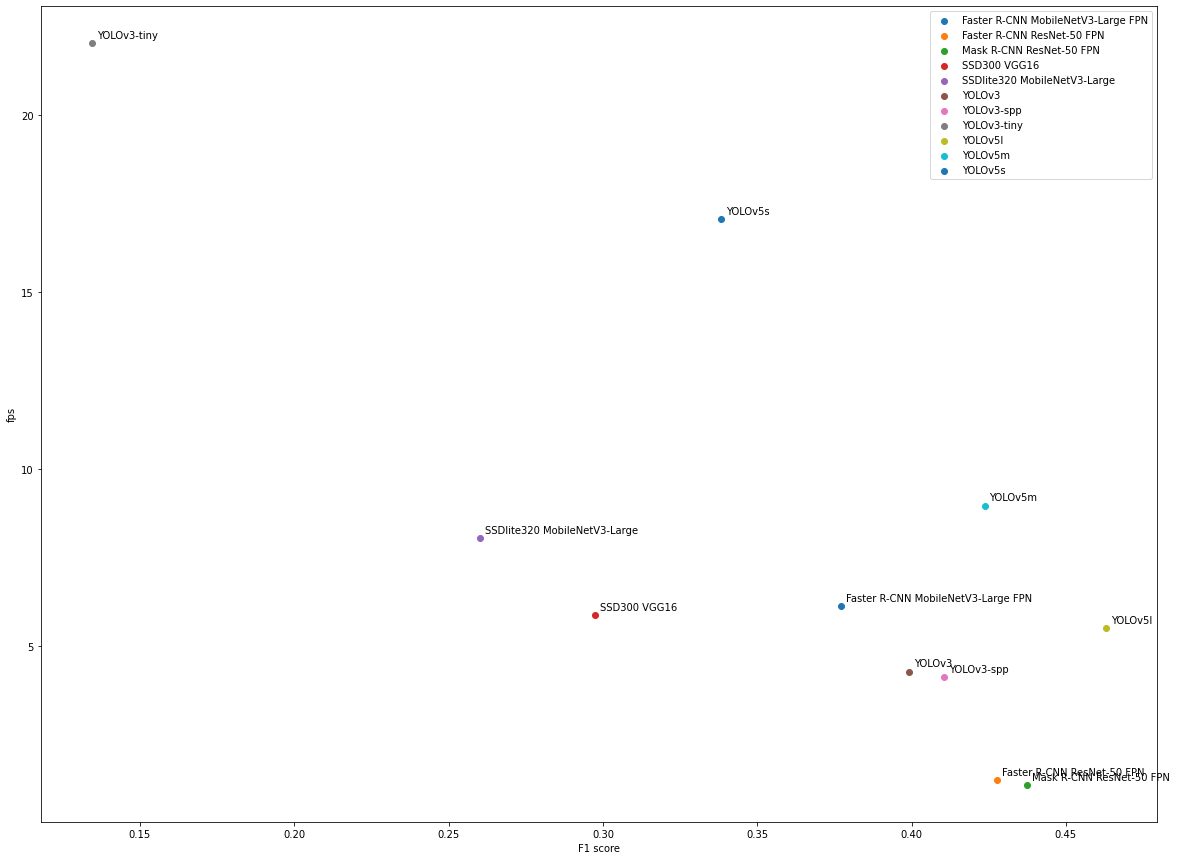

In [15]:
models = results.model.unique()

precision_plot_data = results[
              (results['iou_type'] == 'bbox') &
              (results['metric'] == 'avg_precision') & 
              (results['iou'] == '0.50:0.95') &
              (results['area'] == 'all') &
              (results['max_dets'] == 100)
              ]
recall_plot_data = results[
              (results['iou_type'] == 'bbox') &
              (results['metric'] == 'avg_recall') & 
              (results['iou'] == '0.50:0.95') &
              (results['area'] == 'all') &
              (results['max_dets'] == 100)
              ]

time = precision_plot_data['model_time'].values
fps = 1.0 / time

precision = precision_plot_data['score'].values
recall = recall_plot_data['score'].values
f1 = [2*((precision[i]*recall[i])/(precision[i]+recall[i])) for i in range(0,len(precision))]
print(f1)

plt.figure(figsize=(20,15))

plt.xlabel('F1 score')
plt.ylabel('fps')

for i, model in enumerate(models):
    plt.annotate(model, (f1[i], fps[i]), xytext=(5, 5), textcoords='offset points')
    plt.scatter(f1[i],fps[i])

plt.legend(models, scatterpoints=1)

plt.show()